In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import sys

sys.path.append("../")
import loss_functions as ls
from models import Model
from layers import Linear
from activation_functions import Sigmoid, ReLU, Tanh

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

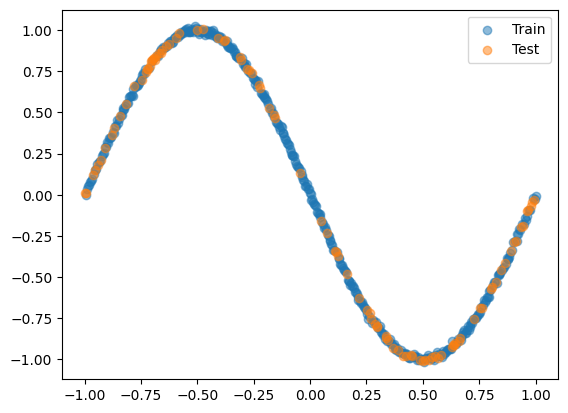

Shape before batching: (400, 1)
Shape after batching: (6, 64, 1)


In [3]:
# Generate sine wave data
x = np.linspace(0, 2 * np.pi, 500).reshape(-1, 1)  # 10x more points
y = np.sin(x) + np.random.normal(0, 0.01, x.shape)  # Add slight noise

# Alternative: Use Min-Max Scaling (range [-1,1])
scaler = MinMaxScaler(feature_range=(-1, 1))
x = scaler.fit_transform(x)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Visualize data distribution
plt.scatter(x_train, y_train, label="Train", alpha=0.5)
plt.scatter(x_test, y_test, label="Test", alpha=0.5)
plt.legend()
plt.show()

print(f"Shape before batching: {x_train.shape}")

# Set batch size
batch_size = 64

# Ensure the training data is evenly divisible by batch size
num_batches = len(x_train) // batch_size
x_train = x_train[: num_batches * batch_size].reshape(num_batches, batch_size, -1)
y_train = y_train[: num_batches * batch_size].reshape(num_batches, batch_size, -1)

print(f"Shape after batching: {x_train.shape}")

In [10]:
model = Model(ls.mse)
# Input layer
model.add(Linear(1, 4, Tanh()))  # Increase hidden size to 32

# Hidden layers
model.add(Linear(4, 8, Tanh()))
model.add(Linear(8, 16, Tanh()))
model.add(Linear(16, 8, Tanh()))
model.add(Linear(8, 4, Tanh()))

# Output layer
model.add(Linear(4, 1, Tanh()))

print(model)

Linear Layer (in 1, out 4), (activation tanh)
Linear Layer (in 4, out 8), (activation tanh)
Linear Layer (in 8, out 16), (activation tanh)
Linear Layer (in 16, out 8), (activation tanh)
Linear Layer (in 8, out 4), (activation tanh)
Linear Layer (in 4, out 1), (activation tanh)


Batch size: 6
Number of samples: 1
Data shape: (1,)
Epoch 0, Loss 0.015519778002907884
Epoch 1, Loss 0.007944496496076113
Epoch 2, Loss 0.010113074768780058
Epoch 3, Loss 0.0085913108901559
Epoch 4, Loss 0.006269574971292782
Epoch 5, Loss 0.0068364734800706005
Epoch 6, Loss 0.006751152209378232
Epoch 7, Loss 0.006141649218102055
Epoch 8, Loss 0.005956551342030463
Epoch 9, Loss 0.005393379189729603
Epoch 10, Loss 0.0053102898690484445
Epoch 11, Loss 0.005000557386059378
Epoch 12, Loss 0.00490977534009259
Epoch 13, Loss 0.004711476897891162
Epoch 14, Loss 0.004594858279351723
Epoch 15, Loss 0.0044558385385752575
Epoch 16, Loss 0.004313166382748668
Epoch 17, Loss 0.0041640951103342665
Epoch 18, Loss 0.004006500537746945
Epoch 19, Loss 0.003839771873280939
Epoch 20, Loss 0.0036657338298488632
Epoch 21, Loss 0.0034882313970936423
Epoch 22, Loss 0.0033140989211797593
Epoch 23, Loss 0.0031563226465325923
Epoch 24, Loss 0.0030372406931235456
Epoch 25, Loss 0.0029660906096850423
Epoch 26, Loss 

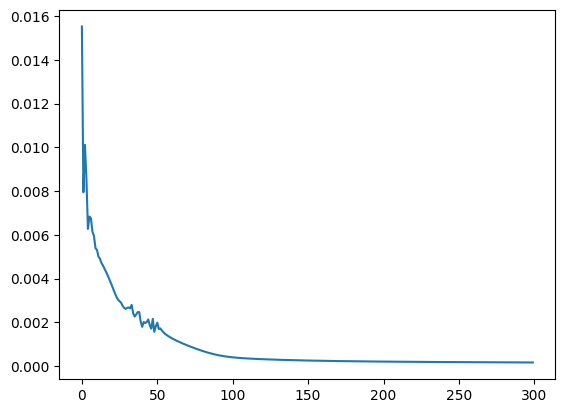

Test Size: 100


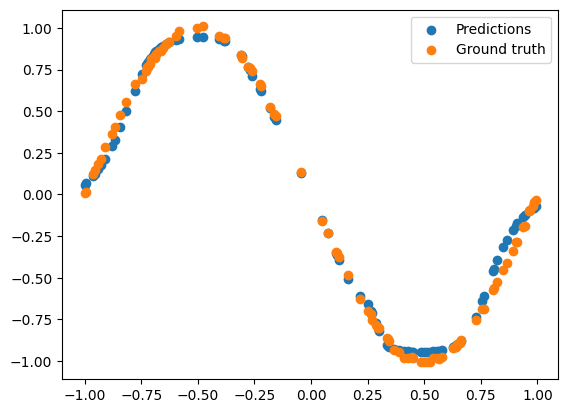

In [11]:
print(f"Batch size: {len(x_train)}")
print(f"Number of samples: {len(x[0])}")
print(f"Data shape: {x[0].shape}")

loss = model.fit(x_train, y_train, 300, 0.001)

plt.plot(loss)
plt.show()

print(f"Test Size: {len(x_test)}")
predictions = []
for batch in x_test:
    predictions.append(model.predict(batch))

predictions = np.array(predictions).reshape(-1, 1)
plt.scatter(x_test, predictions, label="Predictions")
plt.scatter(x_test, y_test, label="Ground truth")
plt.legend()
plt.show()